# 数据可视化

In [1]:
# 导入数据

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入数据

In [2]:
text = pd.read_csv('result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


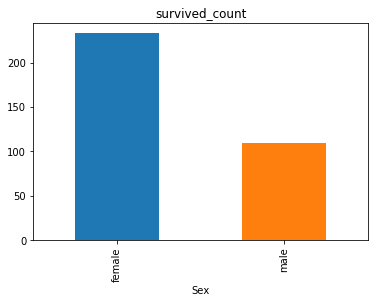

In [4]:
# 可视化展示泰坦尼克号数据集中男女中生存人数分布情况

sex = text.groupby('Sex')['Survived'].sum()
sex.plot.bar()
plt.title('survived_count')
plt.show()

Text(0,0.5,'count')

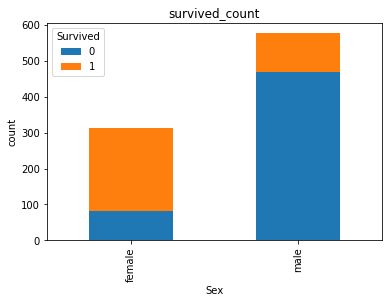

In [5]:
# 可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图

# 提示：计算男女中死亡人数 1表示生存，0表示死亡
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count')
plt.ylabel('count')

In [6]:
# 可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。

# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare_sur

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
26.0000  0           16
13.0000  1           16
26.0000  1           15
10.5000  0           15
0.0000   0           14
7.7750   0           13
7.2500   0           12
7.7500   1           12
8.6625   0           12
7.2292   0           11
7.8542   0           10
7.9250   0           10
10.5000  1            9
7.2250   0            9
26.5500  1            8
7.9250   1            8
24.1500  0            7
9.5000   0            7
16.1000  0            7
26.5500  0            7
69.5500  0            7
31.2750  0            7
7.0500   0            7
14.4542  0            6
27.9000  0            6
39.6875  0            6
                     ..
90.0000  0            1
12.8750  0            1
12.6500  1            1
12.5250  0            1
16.0000  1            1
81.8583  1            1
17.4000  1            1
79.6500  0            1
75.2500  1            1
26.3875  1            

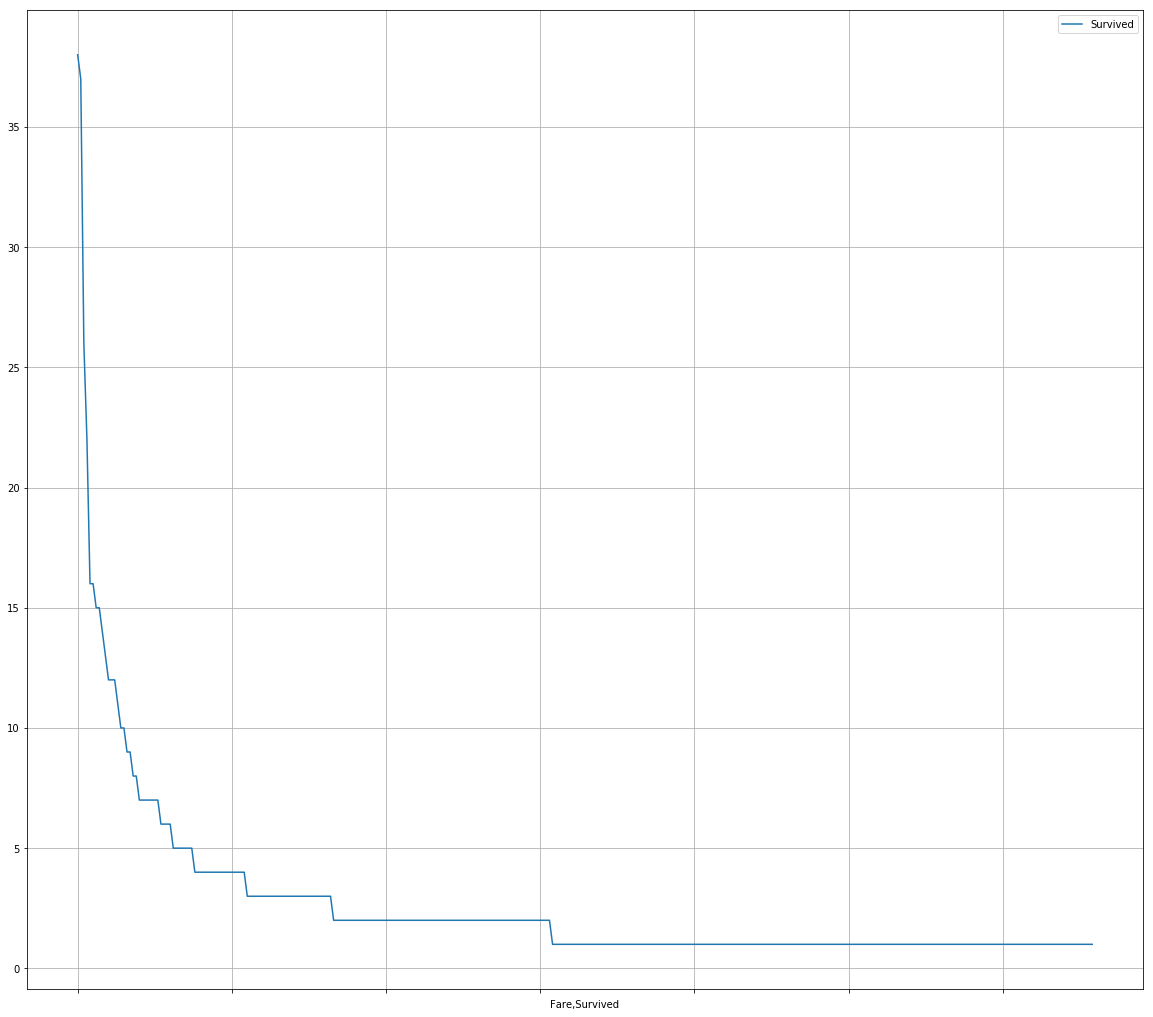

In [7]:
# 排序后绘折线图
fig = plt.figure(figsize=(20, 18))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

In [8]:
# 排序前绘折线图
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
fare_sur1

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
6.4375    0            1
6.4500    0            1
6.4958    0            2
6.7500    0            2
6.8583    0            1
6.9500    0            1
6.9750    0            1
          1            1
7.0458    0            1
7.0500    0            7
7.0542    0            2
7.1250    0            4
7.1417    1            1
7.2250    0            9
          1            3
7.2292    0           11
          1            4
7.2500    0           12
          1            1
7.3125    0            1
7.4958    0            2
          1            1
7.5208    0            1
7.5500    0            3
          1            1
                      ..
106.4250  0            1
          1            1
108.9000  0            1
          1            1
110.8833  1            3
          0            1
113.2750  1            2
          0            1
120.00

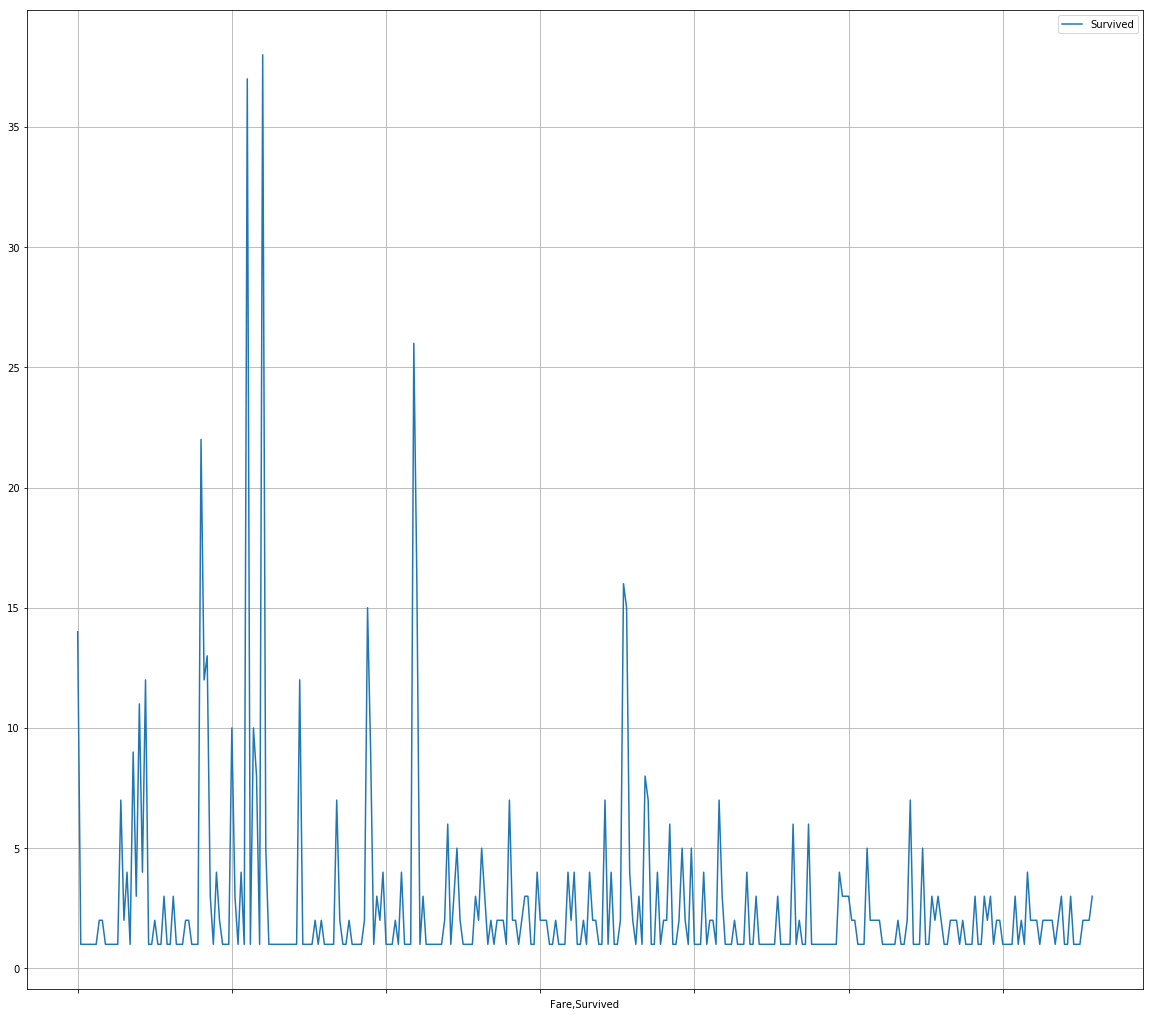

In [9]:
fig = plt.figure(figsize=(20, 18))
fare_sur1.plot(grid=True)
plt.legend()
plt.show()

In [10]:
# 可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。

# 1表示生存，0表示死亡
pclass_sur = text.groupby(['Pclass'])['Survived'].value_counts()
pclass_sur

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

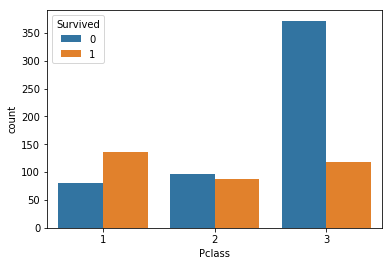

In [11]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=text)

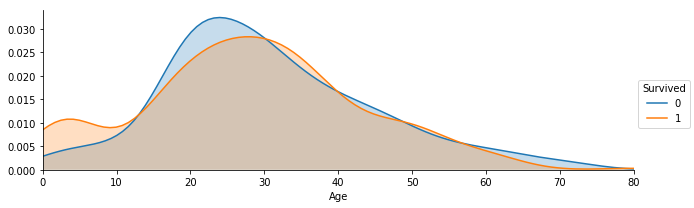

In [12]:
# 可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。

facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()

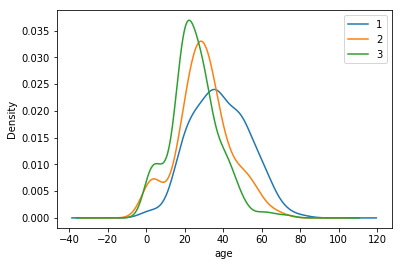

In [13]:
# 可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。

text.Age[text.Pclass == 1].plot(kind='kde')
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")